In [1]:
import pandas as pd
from ast import literal_eval
import glob
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import norm

In [2]:
dfs = []
for file in glob.glob("201*.csv"):
    dfs.append(pd.read_csv(file).drop(columns=["Unnamed: 0"]))
df = pd.concat(dfs)
df.dropna(subset=['Adjectives'], inplace=True) # somekind of mistake

C:\Users\vanki\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (7,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\vanki\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (7,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\vanki\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (7,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df['Relation'] = df['Relation'].map(literal_eval)

In [7]:
males = {}
for lst in df[df['sex'] == 'male'].Relation:
    for r in lst:
        if r in males.keys():
            males[r] += 1
        else:
            males[r] = 1
females = {}
for lst in df[df['sex'] == 'female'].Relation:
    for r in lst:
        if r in females.keys():
            females[r] += 1
        else:
            females[r] = 1

In [8]:
males

{'pobj': 1630053,
 'dep': 2880800,
 'nsubjpass': 106263,
 'appos': 729123,
 'nmod': 972634,
 'dobj': 762698,
 'nsubj': 766344,
 'conj': 258459,
 'npadvmod': 128772,
 'auxpass': 1098,
 'parataxis': 73614,
 'relcl': 2811,
 'ROOT': 112641,
 'attr': 109317,
 'ccomp': 24738,
 'advcl': 14688,
 'oprd': 17414,
 'compound': 835,
 'pcomp': 7659,
 'intj': 1836,
 'acl': 736,
 'neg': 2506,
 'advmod': 798,
 'poss': 2001,
 'agent': 1543,
 'punct': 452,
 'dative': 1147,
 'meta': 4625,
 'xcomp': 766,
 'cc': 349,
 'preconj': 220,
 'aux': 224,
 'case': 4,
 'quantmod': 31,
 'csubj': 94,
 'csubjpass': 5,
 'det': 8,
 'mark': 1,
 'nummod': 1,
 'prep': 2}

In [9]:
females

{'dep': 406362,
 'advcl': 2395,
 'appos': 93591,
 'dobj': 99775,
 'nsubj': 105899,
 'pobj': 218294,
 'ROOT': 20731,
 'nmod': 102471,
 'conj': 51253,
 'attr': 16797,
 'npadvmod': 18337,
 'nsubjpass': 12031,
 'parataxis': 11143,
 'oprd': 2547,
 'ccomp': 3710,
 'meta': 784,
 'agent': 231,
 'pcomp': 984,
 'intj': 421,
 'xcomp': 96,
 'acl': 113,
 'auxpass': 157,
 'compound': 56,
 'neg': 362,
 'relcl': 398,
 'punct': 43,
 'poss': 146,
 'advmod': 108,
 'dative': 153,
 'preconj': 24,
 'csubj': 10,
 'cc': 49,
 'aux': 30,
 'quantmod': 7,
 'mark': 1,
 'nummod': 1}

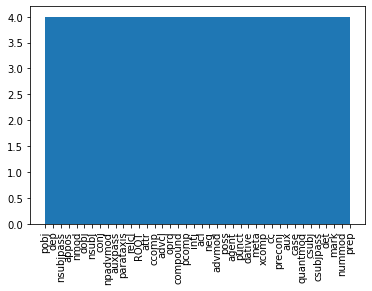

In [14]:
import matplotlib.pyplot as plt
plt.hist(males)
plt.xticks(rotation=90)
plt.show()

In [17]:
males_ct = 0
for key in males.keys():
    males_ct += males[key]
    
females_ct = 0
for key in females.keys():
    females_ct += females[key]

In [18]:
for key in males.keys():
     males[key] /= males_ct
    
for key in females.keys():
     females[key] /= females_ct

In [29]:
fem_df = pd.Series(females, index=females.keys())
mal_df = pd.Series(males, index=males.keys())

In [98]:
df['Relation'].iloc[4]

0                                                    [pobj]
1         [dep, dep, dep, nsubjpass, appos, nmod, pobj, ...
2                                                [dep, dep]
3                                              [pobj, pobj]
4                                          [dep, dep, dobj]
                                ...                        
820229                                        [ROOT, appos]
820230                                        [nmod, appos]
820231                                         [dep, nsubj]
820232                                                [dep]
820233                                               [conj]
Name: Relation, Length: 5188578, dtype: object

In [103]:
df.body.iloc[1]

"Thank you for your posts. I want to pull my hair out when I see liberals stating that [NAME] wasn't that bad. Yes, [NAME] was that bad! [NAME] did a lot of horrible things purely for the benefit of the 1%, it's just that they managed to maintain a pretense of decency and caring that Trump doesn't bother with, but that doesn't make it any better. I was 20 when [NAME] was elected, and paid attention the entire time. The economy was good for awhile because of Clinton, just like Trump inherited a great stock market from Obama and tried to take credit. Bad policies take time to show consequences. The war based on lies, direct messages from god, and Islamophobia was a pretty big deal, but was hardly the only bad thing [NAME] and [NAME] band of Neocons (NOT traditional conservatives) did. Does anyone remember when healthcare was better and affordable before [NAME] deregulated the industry? I sure do. The current situation started with that. [NAME] deregulated many industries which caused all

In [32]:
fem_df.sort_values(ascending=False)[:10]

dep         0.347463
pobj        0.186654
nsubj       0.090550
nmod        0.087619
dobj        0.085314
appos       0.080026
conj        0.043824
ROOT        0.017726
npadvmod    0.015679
attr        0.014362
dtype: float64

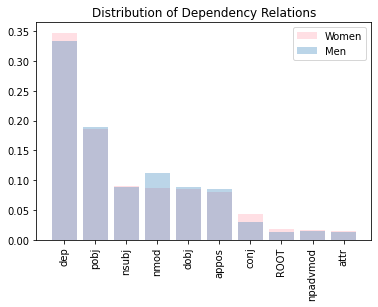

In [42]:
plt.title("Distribution of Dependency Relations")
plt.bar(fem_df.sort_values(ascending=False)[:10].index,fem_df.sort_values(ascending=False)[:10], color='pink', alpha=0.5, label="Women")
plt.bar(mal_df.sort_values(ascending=False)[:10].index,mal_df.sort_values(ascending=False)[:10], alpha=0.3, label="Men")
plt.legend()
#plt.bar(mal_df.sort_values(ascending=False)[:10])
plt.xticks(rotation=90)
plt.show()

In [95]:
# find examples of what can't be parsed
# examples of nmod and conj

pobj         1.891603e-01
dep          3.343039e-01
nsubjpass    1.233134e-02
appos        8.461144e-02
nmod         1.128698e-01
dobj         8.850767e-02
nsubj        8.893077e-02
conj         2.999300e-02
npadvmod     1.494341e-02
auxpass      1.274180e-04
parataxis    8.542573e-03
relcl        3.262039e-04
ROOT         1.307148e-02
attr         1.268575e-02
ccomp        2.870733e-03
advcl        1.704476e-03
oprd         2.020816e-03
compound     9.689799e-05
pcomp        8.887924e-04
intj         2.130595e-04
acl          8.540948e-05
neg          2.908100e-04
advmod       9.260430e-05
poss         2.322070e-04
agent        1.790582e-04
punct        5.245256e-05
dative       1.331042e-04
meta         5.367104e-04
xcomp        8.889085e-05
cc           4.049988e-05
preconj      2.553001e-05
aux          2.599419e-05
case         4.641820e-07
quantmod     3.597410e-06
csubj        1.090828e-05
csubjpass    5.802275e-07
det          9.283640e-07
mark         1.160455e-07
nummod      

In [58]:
def test_sig(POS):
    f= round(females[POS]*females_ct)*[1] + [0]*round(females_ct*(1-females[POS]))
    m = round(males[POS]*males_ct)*[1] + [0]*round(males_ct*(1-males[POS]))
    return ttest_ind(f, m)

In [73]:
f = {}
for key in females.keys():
    f[key] = round(females[key]*females_ct)
    
m = {}
for key in males.keys():
    m[key] = round(males[key]*males_ct)

In [88]:
from scipy.stats import chisquare
fm = pd.DataFrame([f,m], index=['females','males']).fillna(0)
chisquare(fm[fm > 5].dropna(axis=1))

Power_divergenceResult(statistic=array([1.86265338e+06, 8.84609548e+03, 4.90937219e+05, 5.09542796e+05,
       5.00075779e+05, 1.07829508e+06, 6.33374929e+04, 7.04288090e+05,
       1.38626616e+05, 6.78747038e+04, 8.29037600e+04, 7.50644143e+04,
       4.60448794e+04, 1.10729768e+04, 1.55433346e+04, 2.72754317e+03,
       9.70317926e+02, 5.15511107e+03, 8.87117856e+02, 5.20765661e+02,
       4.57160188e+02, 7.05562550e+02, 6.81078563e+02, 1.60276709e+03,
       1.81444967e+03, 3.37941414e+02, 1.60271309e+03, 5.25496689e+02,
       7.60027692e+02, 1.57442623e+02, 6.78461538e+01, 2.26130653e+02,
       1.48173228e+02, 1.51578947e+01]), pvalue=array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       5.08365669e-213, 0.00000000e+000, 6.19821280

In [94]:
chisquare(fm[fm > 5].dropna(axis=1).loc['females'], fm[fm > 5].dropna(axis=1).loc['males'])

Power_divergenceResult(statistic=6439482.995561551, pvalue=0.0)

In [70]:
test_sig('dep')

Ttest_indResult(statistic=28.275704858394878, pvalue=6.990563922498237e-176)

In [54]:
from random import shuffle
ttest_ind(f_nmods, m_nmods)

Ttest_indResult(statistic=-81.9709068995619, pvalue=0.0)

In [56]:
females['nmod']

0.08761874631255825

In [57]:
males['nmod']

0.11286979347383348